<a href="https://colab.research.google.com/github/TyrGunllod/alura_store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
# Importa as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Lista com todas as URLs
urls = [
    "https://raw.githubusercontent.com/TyrGunllod/alura_store/refs/heads/main/dados_lojas/loja_1.csv",
    "https://raw.githubusercontent.com/TyrGunllod/alura_store/refs/heads/main/dados_lojas/loja_2.csv",
    "https://raw.githubusercontent.com/TyrGunllod/alura_store/refs/heads/main/dados_lojas/loja_3.csv",
    "https://raw.githubusercontent.com/TyrGunllod/alura_store/refs/heads/main/dados_lojas/loja_4.csv"
]

# Carrega todos os DataFrames usando list comprehension
lojas = [pd.read_csv(url) for url in urls]


Funções

In [2]:
# Função que soma os valores de uma coluna numérica
def soma_por_coluna(arquivo, coluna):
    # Calcula a soma total da coluna especificada
    soma = arquivo[coluna].sum()
    return soma

# Função que calcula a média dos valores de uma coluna numérica
def media_por_coluna(arquivo, coluna):
    # Calcula a média da coluna e arredonda para 2 casas decimais
    media_valor = round(arquivo[coluna].mean(), 2)
    return media_valor

# Função que soma os valores da coluna "Preço" agrupando por uma categoria
def soma_por_categoria(arquivo, coluna):
    # Agrupa os dados pela categoria e soma os preços de cada grupo
    soma = arquivo.groupby(coluna)["Preço"].sum().sort_values(ascending=False)
    return soma

# Função que conta a quantidade de produtos por tipo ou categoria
def soma_produtos_tipo(arquivo, coluna):
    # Agrupa os dados pela coluna e conta quantas vezes cada valor aparece
    qt_produtos_tipo = arquivo.groupby(coluna).size().sort_values(ascending=False)
    return qt_produtos_tipo

#1. Análise do faturamento


In [3]:
# ==============================================
# ANÁLISE DE FATURAMENTO DAS LOJAS
# ==============================================

# Lista que armazenará o faturamento individual de cada loja
faturamento_loja = []

# Loop para calcular o faturamento (soma da coluna 'Preço') de cada loja
for i in range(len(lojas)):
    faturamento_loja.append(soma_por_coluna(lojas[i], 'Preço'))

# Exibe o faturamento de cada loja individualmente
for i, valor in enumerate(faturamento_loja, start=1):
    print(f'Faturamento da loja {i}: R$ {valor:.2f}')

# Calcula o faturamento total
faturamento_total = sum(faturamento_loja)
print(f'\nFaturamento total das lojas: R$ {faturamento_total:.2f}')

Faturamento da loja 1: R$ 1534509.12
Faturamento da loja 2: R$ 1488459.06
Faturamento da loja 3: R$ 1464025.03
Faturamento da loja 4: R$ 1384497.58

Faturamento total das lojas: R$ 5871490.79


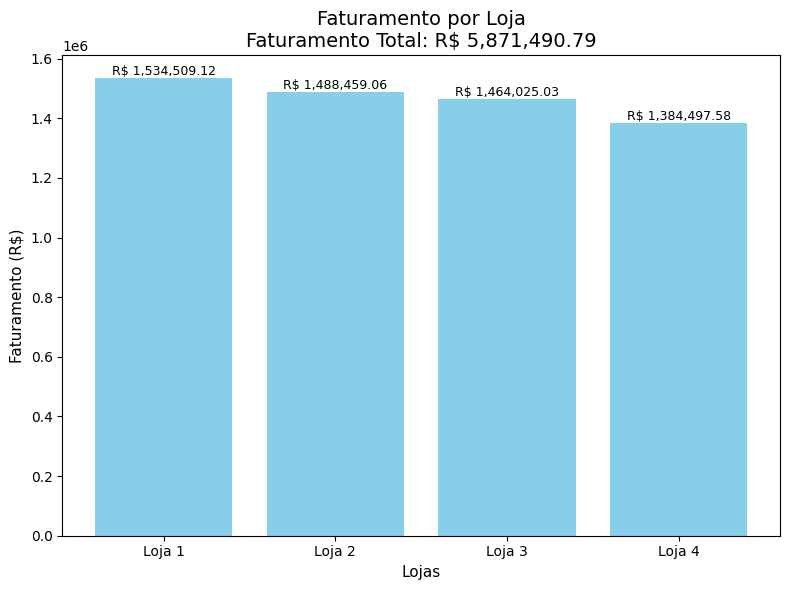

In [ ]:
# Geração do gráfico de faturamento por loja

# Lista com nomes das lojas para o eixo X
nomes_lojas = [f'Loja {i}' for i in range(1, len(lojas) + 1)]

# Cria a figura e os eixos do gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Cria as barras verticais
barras = ax.bar(nomes_lojas, faturamento_loja, color='skyblue')

# Adiciona os valores de faturamento sobre cada barra
for bar, valor in zip(barras, faturamento_loja):
    altura = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, altura + 500,  # posição do texto
            f'R$ {valor:,.2f}', ha='center', va='bottom', fontsize=9)

# Define título e rótulos
ax.set_title(f'Faturamento por Loja\nFaturamento Total: R$ {faturamento_total:,.2f}', fontsize=14)
ax.set_ylabel('Faturamento (R$)', fontsize=11)
ax.set_xlabel('Lojas', fontsize=11)

# Melhora o layout
plt.tight_layout()

# Exibe o gráfico
plt.show()

# 2. Vendas por Categoria


In [ ]:
# ==============================================
# ANÁLISE DE FATURAMENTO POR CATEGORIA - POR LOJA
# ==============================================

# Lista que armazenará os DataFrames com faturamento por categoria de cada loja
vendas_categoria = []

# Loop para calcular o faturamento por categoria de produto em cada loja
for i in range(len(lojas)):
    # Utiliza a função 'soma_por_categoria' para somar os preços por categoria
    vendas_categoria.append(soma_por_categoria(lojas[i], 'Categoria do Produto'))

# Loop para exibir os resultados de faturamento por categoria para cada loja
for i, categoria in enumerate(vendas_categoria, start=1):
    print(f'\nFaturamento por categoria - Loja {i}:\n')

    # Itera sobre os pares (nome da categoria, valor total)
    for nome_categoria, total in categoria.items():
        print(f' - {nome_categoria}: R$ {total:.2f}')

    # Linha em branco entre os resultados de cada loja
    print()


Faturamento por categoria - Loja 1:

 - eletronicos: R$ 572659.23
 - eletrodomesticos: R$ 484913.36
 - moveis: R$ 250178.11
 - instrumentos musicais: R$ 121731.69
 - esporte e lazer: R$ 52387.55
 - brinquedos: R$ 23993.78
 - utilidades domesticas: R$ 16931.48
 - livros: R$ 11713.92


Faturamento por categoria - Loja 2:

 - eletronicos: R$ 547773.71
 - eletrodomesticos: R$ 464758.13
 - moveis: R$ 235234.68
 - instrumentos musicais: R$ 139987.03
 - esporte e lazer: R$ 46326.09
 - brinquedos: R$ 21262.21
 - utilidades domesticas: R$ 19662.86
 - livros: R$ 13454.35


Faturamento por categoria - Loja 3:

 - eletronicos: R$ 547699.92
 - eletrodomesticos: R$ 438984.89
 - moveis: R$ 268095.56
 - instrumentos musicais: R$ 103174.45
 - esporte e lazer: R$ 47456.10
 - brinquedos: R$ 25869.20
 - utilidades domesticas: R$ 20080.21
 - livros: R$ 12664.70


Faturamento por categoria - Loja 4:

 - eletronicos: R$ 545966.86
 - eletrodomesticos: R$ 377680.65
 - moveis: R$ 256705.65
 - instrumentos musi

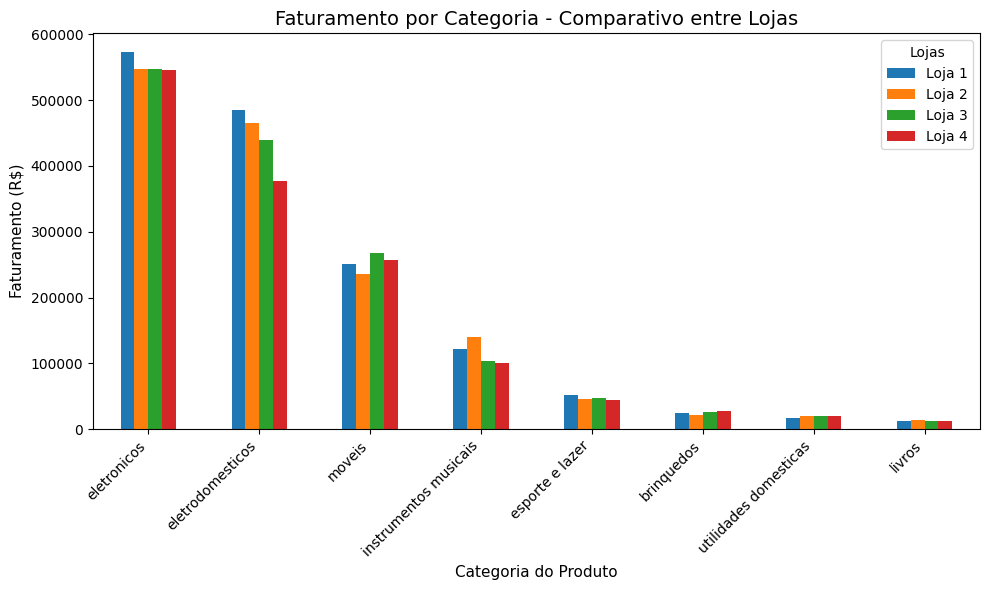

In [ ]:
# Concatena todos os DataFrames por categoria, renomeando colunas
df_categorias = pd.concat(vendas_categoria, axis=1)
df_categorias.columns = [f'Loja {i+1}' for i in range(len(lojas))]
df_categorias = df_categorias.fillna(0)

# Cria o gráfico comparativo
fig, ax = plt.subplots(figsize=(10, 6))
df_categorias.plot(kind='bar', ax=ax)

# Título e rótulos
ax.set_title('Faturamento por Categoria - Comparativo entre Lojas', fontsize=14)
ax.set_xlabel('Categoria do Produto', fontsize=11)
ax.set_ylabel('Faturamento (R$)', fontsize=11)
ax.legend(title='Lojas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

Média das avaliações da loja 1: 3.98/5.0
Média das avaliações da loja 2: 4.04/5.0
Média das avaliações da loja 3: 4.05/5.0
Média das avaliações da loja 4: 4.00/5.0



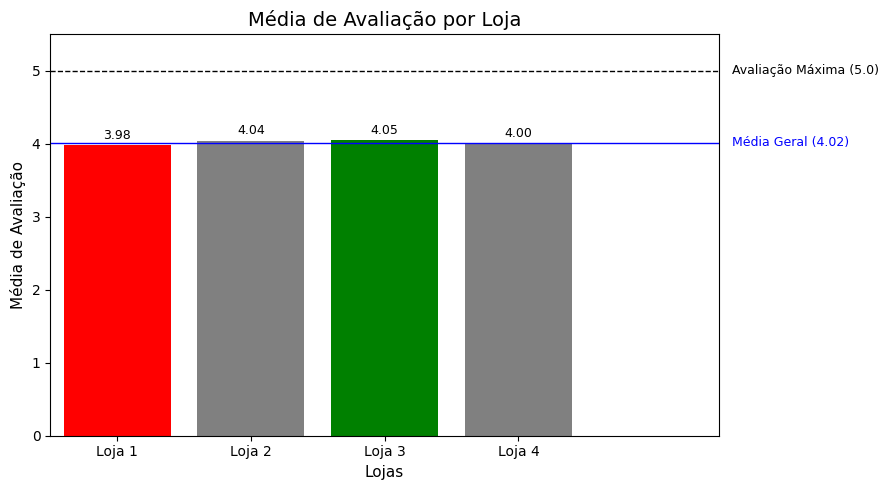

In [ ]:
# ==============================================
# MÉDIA DE AVALIAÇÃO DAS LOJAS
# ==============================================

# Lista que armazenará a média de avaliação de cada loja
media_avaliacoes = []

# Loop para calcular a média das avaliações em cada loja
for i in range(len(lojas)):
    # Usa a função media_por_coluna para obter a média da coluna 'Avaliação da compra'
    media_avaliacoes.append(media_por_coluna(lojas[i], 'Avaliação da compra'))

# Loop para exibir a média de avaliação de cada loja formatada com 2 casas decimais
for i, media in enumerate(media_avaliacoes, start=1):
    print(f'Média das avaliações da loja {i}: {media:.2f}/5.0')

# Linha em branco para separar visualmente a saída
print()

# Lista com os nomes das lojas
nomes_lojas = [f'Loja {i}' for i in range(1, len(lojas) + 1)]

# Calcula a média geral
media_geral = sum(media_avaliacoes) / len(media_avaliacoes)

# Identifica maior e menor média
media_max = max(media_avaliacoes)
media_min = min(media_avaliacoes)

# Define cores com base na média
cores = [
    'green' if media == media_max else
    'red' if media == media_min else
    'gray'
    for media in media_avaliacoes
]

# Cria figura e eixos
fig, ax = plt.subplots(figsize=(9, 5))

# Gráfico de barras
barras = ax.bar(nomes_lojas, media_avaliacoes, color=cores)

# Adiciona os valores nas barras
for bar, media in zip(barras, media_avaliacoes):
    altura = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, altura + 0.05,
            f'{media:.2f}', ha='center', va='bottom', fontsize=9)

# Define limites do eixo X para abrir espaço à direita
ax.set_xlim(-0.5, len(lojas) - 0.5 + 1)  # adiciona +1 espaço à direita

# Linha da avaliação máxima
ax.axhline(y=5, color='black', linestyle='--', linewidth=1)
# Texto à direita da linha (fora do gráfico)
ax.text(len(lojas) - 0.1 + 0.7, 5, 'Avaliação Máxima (5.0)', color='black', fontsize=9, va='center')

# Linha da média geral
ax.axhline(y=media_geral, color='blue', linestyle='-', linewidth=1)
# Texto à direita da linha (fora do gráfico)
ax.text(len(lojas) - 0.1 + 0.7, media_geral, f'Média Geral ({media_geral:.2f})',
        color='blue', fontsize=9, va='center')

# Títulos e rótulos
ax.set_title('Média de Avaliação por Loja', fontsize=14)
ax.set_ylabel('Média de Avaliação', fontsize=11)
ax.set_xlabel('Lojas', fontsize=11)

# Limite do eixo Y
ax.set_ylim(0, 5.5)

# Melhorar o layout
plt.tight_layout()

# Exibe o gráfico
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
# ==============================================
# ANÁLISE DE PRODUTOS VENDIDOS POR LOJA
# ==============================================

# Lista que armazenará as quantidades de produtos vendidos por loja
produtos_vendidos = []

# Preenche a lista com as contagens por tipo de produto
for i in range(len(lojas)):
    produtos_vendidos.append(soma_produtos_tipo(lojas[i], 'Produto'))

for i, df_produtos in enumerate(produtos_vendidos, start=1):
    qtd_mais_vendido = df_produtos.max()
    qtd_menos_vendido = df_produtos.min()

    mais_vendidos = df_produtos[df_produtos == qtd_mais_vendido]
    menos_vendidos = df_produtos[df_produtos == qtd_menos_vendido]

    print(f'Loja {i}:')

    print(f'  Mais vendidos ({qtd_mais_vendido} unidades):')
    for produto, qtd in mais_vendidos.items():
        print(f'   - {produto}')

    print(f'  Menos vendidos ({qtd_menos_vendido} unidades):')
    for produto, qtd in menos_vendidos.items():
        print(f'   - {produto}')

    print()  # Linha em branco entre as lojas

Loja 1:
  Mais vendidos (60 unidades):
   - TV Led UHD 4K
   - Micro-ondas
   - Guarda roupas
  Menos vendidos (33 unidades):
   - Celular ABXY
   - Headset

Loja 2:
  Mais vendidos (65 unidades):
   - Iniciando em programação
  Menos vendidos (32 unidades):
   - Jogo de tabuleiro

Loja 3:
  Mais vendidos (57 unidades):
   - Kit banquetas
  Menos vendidos (35 unidades):
   - Blocos de montar

Loja 4:
  Mais vendidos (62 unidades):
   - Cama box
  Menos vendidos (33 unidades):
   - Guitarra



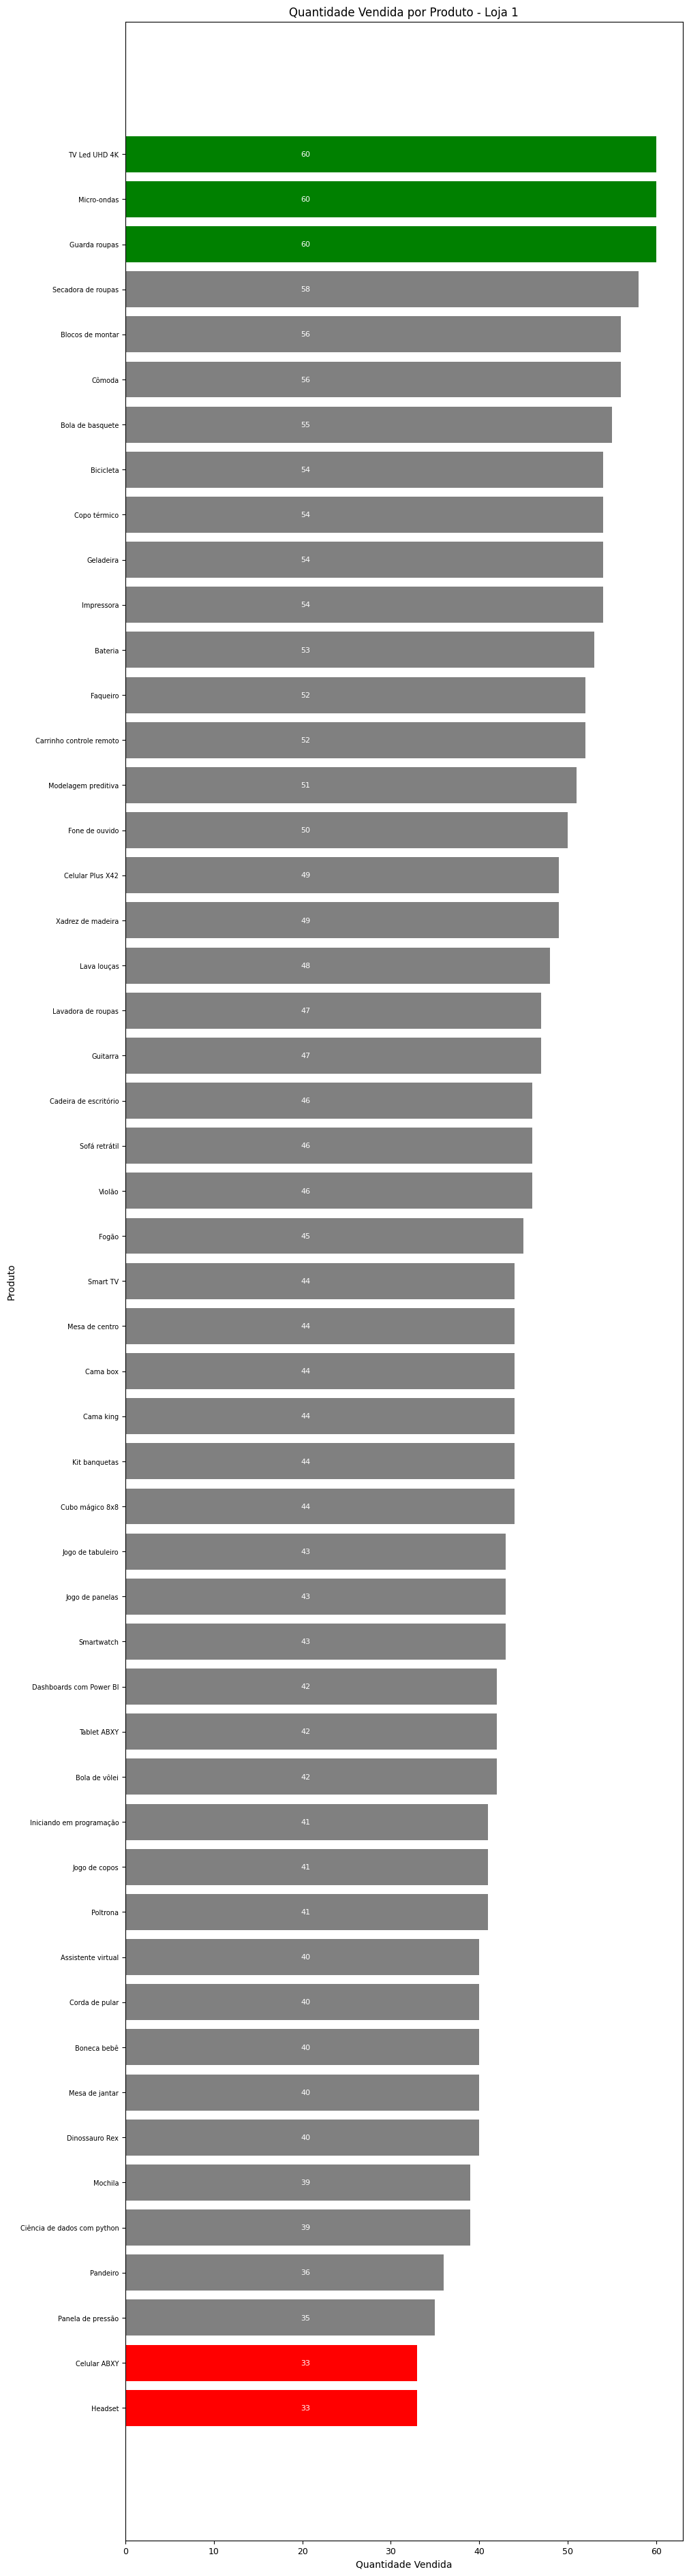

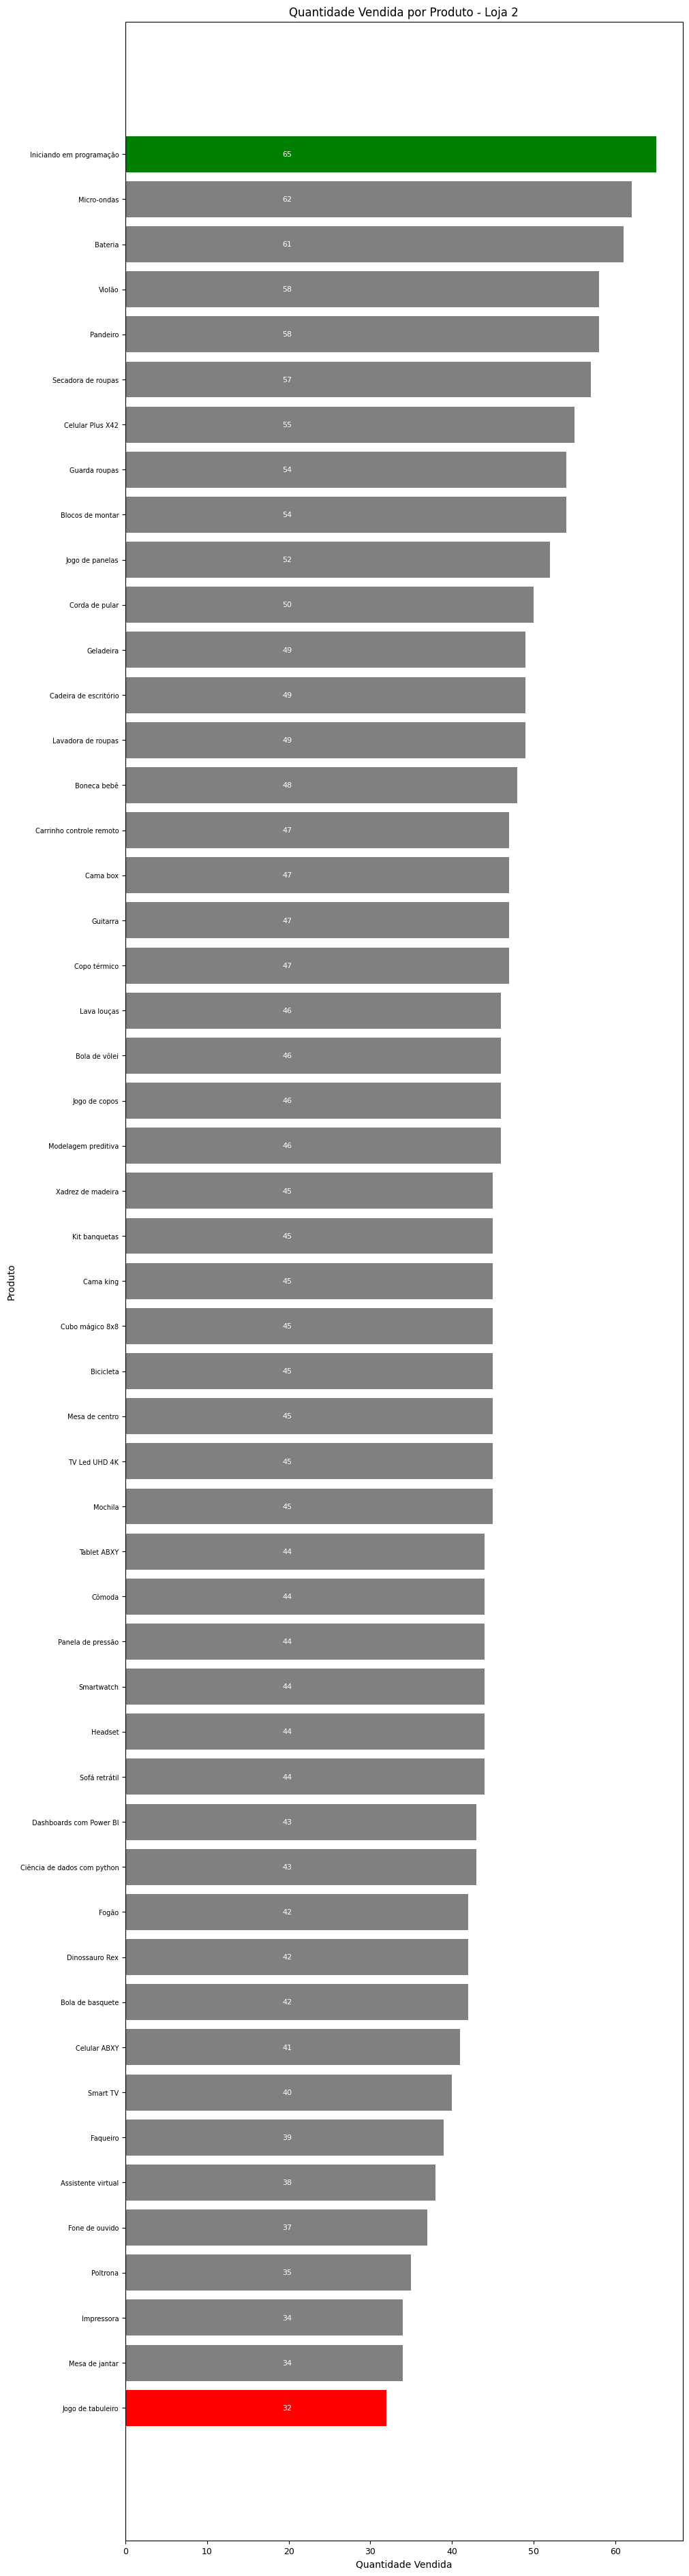

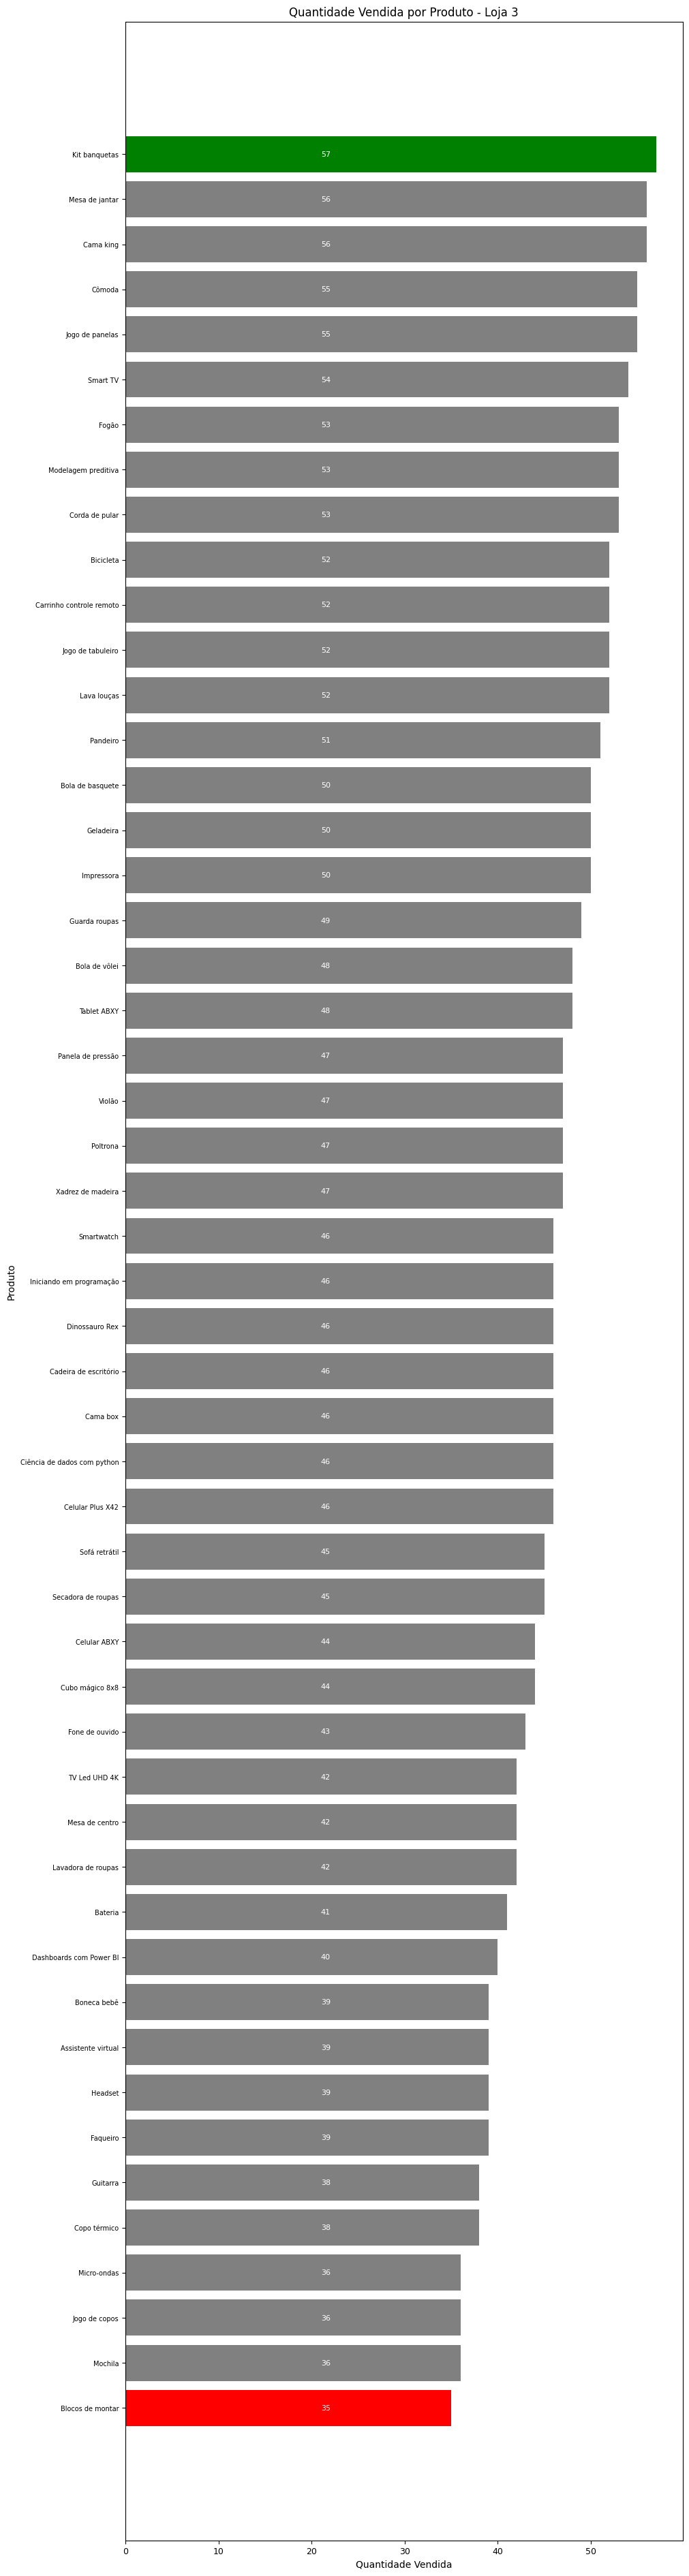

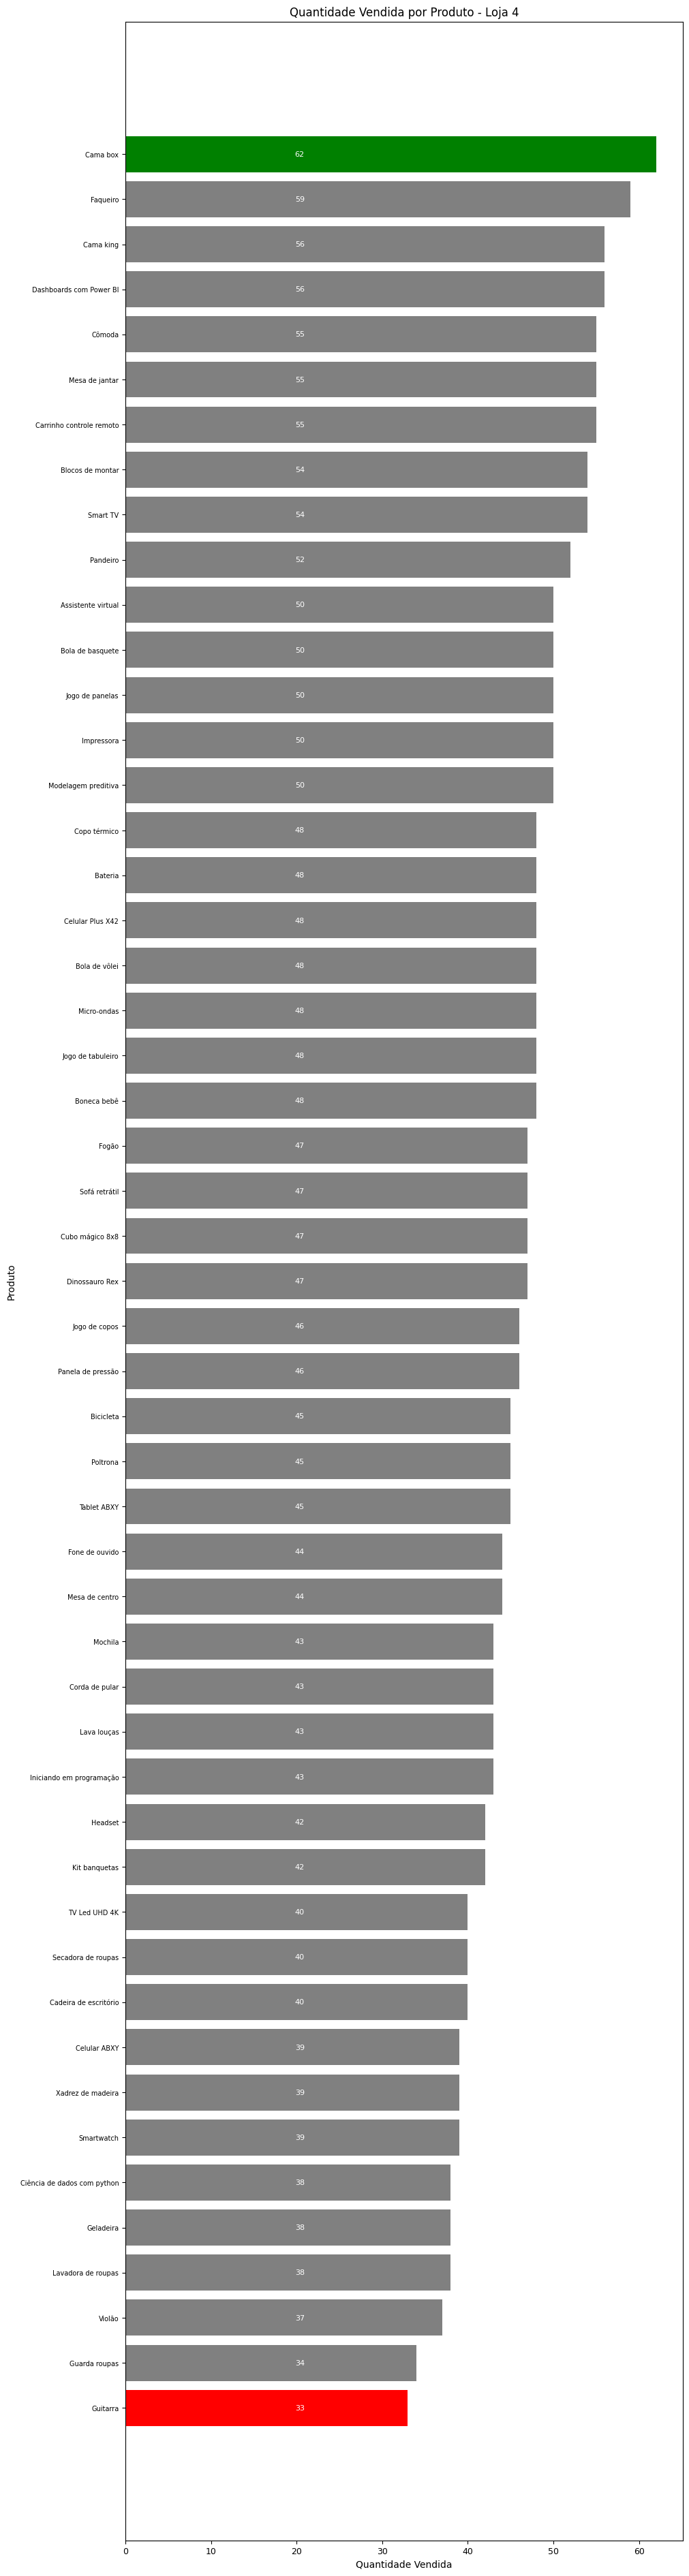

In [ ]:
# Lista para armazenar os objetos de figura gerados pelos gráficos
figs = []

# Loop para gerar os gráficos de cada loja
for i, df_produtos in enumerate(produtos_vendidos, start=1):
    # Ordena os produtos do mais vendido ao menos vendido
    df_ordenado = df_produtos.sort_values(ascending=False)

    # Obtém os valores máximo e mínimo para definir as cores
    qtd_max = df_ordenado.max()
    qtd_min = df_ordenado.min()

    # Define as cores para as barras:
    # Verde para o mais vendido, vermelho para o menos vendido, cinza para os demais
    cores = [
        'green' if qtd == qtd_max else
        'red' if qtd == qtd_min else
        'gray'
        for qtd in df_ordenado
    ]

    # Cria a figura do gráfico com altura proporcional à quantidade de produtos
    fig, ax = plt.subplots(figsize=(10, 0.7 * len(df_ordenado) + 2), constrained_layout=True)

    # Cria gráfico de barras horizontais
    bars = ax.barh(df_ordenado.index, df_ordenado.values, color=cores)

    # Define o título e os rótulos dos eixos
    ax.set_title(f'Quantidade Vendida por Produto - Loja {i}', fontsize=12)
    ax.set_xlabel('Quantidade Vendida', fontsize=10)
    ax.set_ylabel('Produto', fontsize=10)

    # Ajusta o tamanho da fonte dos rótulos dos eixos
    ax.tick_params(axis='y', labelsize=7)
    ax.tick_params(axis='x', labelsize=9)

    # Inverte o eixo Y para que o mais vendido fique no topo
    ax.invert_yaxis()

    # Define a posição horizontal para o texto dentro da barra
    x_text = qtd_min * 0.6
    if x_text < 1:
        x_text = 1

    # Adiciona as quantidades dentro das barras
    for bar, qtd in zip(bars, df_ordenado.values):
        y = bar.get_y() + bar.get_height() / 2  # centro vertical da barra
        ax.text(x_text, y, f'{qtd}', va='center', ha='left', fontsize=8, color='white')

    # Armazena a figura na lista
    figs.append(fig)

# Exibe todos os gráficos após o processamento
plt.show()

# 5. Frete Médio por Loja


In [16]:
# ==============================================
# ANÁLISE DO FRETE MÉDIO POR LOJA
# ==============================================

frete_medio = []

# Percorre cada loja
for i in range(len(lojas)):
    # Filtra apenas os fretes maiores que zero
    dados_filtrados = lojas[i][lojas[i]['Frete'] > 0]

    # Calcula a média apenas dos fretes válidos
    frete_medio.append(media_por_coluna(dados_filtrados, 'Frete'))

# Exibe o resultado formatado
for i, media in enumerate(frete_medio, start=1):
    print(f'Custo do frete médio da loja {i}: R${media:.2f}')

# ==============================================
# ANÁLISE DE PRODUTOS POR FAIXA DE FRETE
# ==============================================

# Define as faixas de frete
bins = [0, 10, 20, 30, 40, 50, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']

# Lista para armazenar os dados para plotar depois
graficos = []

# Itera pelas lojas (1 a 4)
for i, loja in enumerate(lojas, start=1):
    # Filtra fretes maiores que 0 e faz uma cópia segura
    dados_filtrados = loja[loja['Frete'] > 0].copy()

    # Cria a coluna de faixa de frete
    dados_filtrados['Faixa de Frete'] = pd.cut(
        dados_filtrados['Frete'],
        bins=bins,
        labels=labels,
        right=False
    )

    # Conta a quantidade de produtos por faixa e garante a ordem das faixas
    produtos_por_faixa = dados_filtrados['Faixa de Frete'].value_counts().reindex(labels)

    # Exibe os dados no terminal
    print(f"\n📊 Loja {i} - Quantidade de Produtos por Faixa de Frete:")
    print(produtos_por_faixa)

    # Armazena os dados e o índice da loja para gerar os gráficos depois
    graficos.append((i, produtos_por_faixa))

Custo do frete médio da loja 1: R$38.06
Custo do frete médio da loja 2: R$36.98
Custo do frete médio da loja 3: R$36.27
Custo do frete médio da loja 4: R$34.11

📊 Loja 1 - Quantidade de Produtos por Faixa de Frete:
Faixa de Frete
0-10     714
10-20    375
20-30    202
30-40    170
40-50    129
50+      560
Name: count, dtype: int64

📊 Loja 2 - Quantidade de Produtos por Faixa de Frete:
Faixa de Frete
0-10     761
10-20    342
20-30    183
30-40    168
40-50    140
50+      551
Name: count, dtype: int64

📊 Loja 3 - Quantidade de Produtos por Faixa de Frete:
Faixa de Frete
0-10     723
10-20    399
20-30    211
30-40    140
40-50    133
50+      545
Name: count, dtype: int64

📊 Loja 4 - Quantidade de Produtos por Faixa de Frete:
Faixa de Frete
0-10     782
10-20    410
20-30    212
30-40    121
40-50    146
50+      491
Name: count, dtype: int64


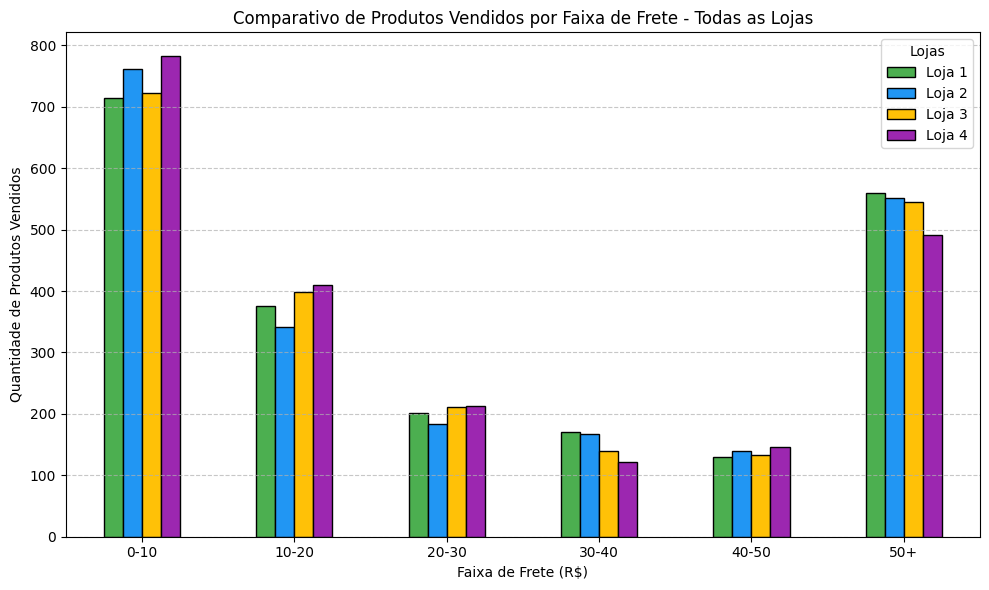

In [18]:
# Define faixas e rótulos
bins = [0, 10, 20, 30, 40, 50, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']

# Dicionário para armazenar os dados de todas as lojas
dados_comparativos = {}

# Processa cada loja
for i, loja in enumerate(lojas, start=1):
    # Filtra fretes maiores que 0 e cria cópia segura
    dados_filtrados = loja[loja['Frete'] > 0].copy()

    # Cria coluna de faixa de frete
    dados_filtrados['Faixa de Frete'] = pd.cut(
        dados_filtrados['Frete'],
        bins=bins,
        labels=labels,
        right=False
    )

    # Conta produtos por faixa, garante a ordem
    produtos_por_faixa = dados_filtrados['Faixa de Frete'].value_counts().reindex(labels)

    # Salva no dicionário com o nome da loja
    dados_comparativos[f'Loja {i}'] = produtos_por_faixa

# Converte para DataFrame
df_comparativo = pd.DataFrame(dados_comparativos)

# ==============================================
# GERA O GRÁFICO COMPARATIVO
# ==============================================

# Define cores para as barras
cores = ['#4CAF50', '#2196F3', '#FFC107', '#9C27B0']

# Cria gráfico de barras agrupadas
df_comparativo.plot(
    kind='bar',
    figsize=(10, 6),
    color=cores,
    edgecolor='black'
)

# Ajustes de rótulos e estilo
plt.title('Comparativo de Produtos Vendidos por Faixa de Frete - Todas as Lojas')
plt.xlabel('Faixa de Frete (R$)')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Lojas')
plt.tight_layout()

# Relatório

# 🧾 Relatório Final – Análise de Desempenho das Lojas

## 📌 Introdução

O objetivo deste relatório é auxiliar o Sr. João a tomar uma decisão estratégica sobre **qual das quatro lojas vender**. A partir de uma análise detalhada dos dados de vendas, avaliações e localização geográfica, buscamos identificar a loja com o **pior desempenho geral**, considerando os seguintes fatores:

- Faturamento total
- Categorias mais e menos vendidas
- Avaliação média dos clientes
- Produtos mais e menos vendidos
- Frete médio
- Distribuição geográfica das vendas

---

## 📊 Análise dos Indicadores

### 💰 Faturamento Total

A seguir, o gráfico mostra o faturamento total de cada loja:

![Faturamento Geral](https://github.com/TyrGunllod/alura_store/blob/main/images/fat_geral.png?raw=1)

- **Loja 1**: Maior faturamento geral, indicando forte desempenho.
- **Loja 2**: Faturamento intermediário e estável.
- **Loja 3**: Menor faturamento total.
- **Loja 4**: Levemente abaixo da Loja 2, desempenho mediano.

---

### 📦 Categorias de Produtos

![Faturamento Categorias](https://github.com/TyrGunllod/alura_store/blob/main/images/fat_cat.png?raw=1)

- **Loja 1**: Maior diversidade de categorias vendidas.
- **Loja 2**: Foco em poucas categorias com vendas concentradas.
- **Loja 3**: Baixa diversidade e baixo volume.
- **Loja 4**: Desempenho misto – boas vendas em algumas categorias, fraco em outras.

---

### 🌟 Avaliação Média dos Clientes

![Avaliação Média](https://github.com/TyrGunllod/alura_store/blob/main/images/med_aval.png?raw=1)

- **Loja 2**: Melhor avaliação média dos clientes.
- **Loja 1**: Avaliação positiva, mas não a mais alta.
- **Loja 4**: Avaliação mediana, com margem para melhorias.
- **Loja 3**: Pior avaliação, indicando insatisfação do cliente.

---

### 🛒 Produtos Mais e Menos Vendidos

![Produtos mai e menos vendidos -  Loja 1](https://github.com/TyrGunllod/alura_store/blob/main/images/qtv_l1.png?raw=1)
![Produtos mai e menos vendidos -  Loja 2](https://github.com/TyrGunllod/alura_store/blob/main/images/qtv_l2.png?raw=1)
![Produtos mai e menos vendidos -  Loja 3](https://github.com/TyrGunllod/alura_store/blob/main/images/qtv_l3.png?raw=1)
![Produtos mai e menos vendidos -  Loja 4](https://github.com/TyrGunllod/alura_store/blob/main/images/qtv_l4.png?raw=1)

- **Loja 1**: Mais produtos com alta saída.
- **Loja 2**: Boa performance com poucos produtos líderes.
- **Loja 4**: Mistura de produtos populares e encalhados.
- **Loja 3**: Baixa rotatividade de produtos.

---

### 🚚 Frete Médio

![Frete Médio](https://github.com/TyrGunllod/alura_store/blob/main/images/frete.png?raw=1)

- **Loja 2**: Frete mais barato.
- **Loja 1**: Frete equilibrado.
- **Loja 4**: Frete mais caro que a média.
- **Loja 3**: Frete mais caro de todos.

---

### 🗺️ Distribuição Geográfica das Vendas

![Mapa](https://github.com/TyrGunllod/alura_store/blob/main/images/mapa.png?raw=1)

- **Loja 1**: Alta concentração de vendas em áreas densas.
- **Loja 2**: Boas vendas regionais com alta satisfação.
- **Loja 4**: Distribuição sem foco claro, performance geográfica inconsistente.
- **Loja 3**: Alcance geográfico limitado.

---

## ✅ Conclusão e Recomendação

Com base nas análises apresentadas, **recomendamos que o Sr. João venda a Loja 3**.

### Justificativa:

**Loja 3 apresenta os piores resultados gerais:**
- Menor faturamento
- Pior avaliação dos clientes
- Frete mais caro
- Produtos com baixa rotatividade
- Baixa diversidade de categorias
- Distribuição geográfica limitada

**A Loja 4**, embora também apresente pontos fracos, **tem mais potencial de recuperação**, especialmente com ajustes logísticos e foco em categorias de maior saída.

---

### 🏆 Lojas Recomendadas para Permanecer no Negócio

- **Loja 1**: Melhor desempenho geral (faturamento, variedade, alcance).
- **Loja 2**: Alta satisfação dos clientes e frete competitivo.

---

### 📤 Próximos Passos

Com base na decisão, recomendamos:
- Vender a Loja 3 o quanto antes.
- Reavaliar estratégias de logística e marketing para a Loja 4.
- Investir na expansão e manutenção das Lojas 1 e 2.

---

*Este relatório foi gerado com base em dados reais das vendas e análises exploratórias utilizando Python e bibliotecas de visualização como Matplotlib, Seaborn e Folium.*